## Random Forest

**Random Forest (or Random Decision Forest)** is an ensemble learning method for classification or regression that operates by constructing multiple decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forest correct for decision trees' habit of overfitting to their training set.

Why the name ‘random forest?’ Well, each decision tree in the forest considers a random subset of features when forming the tree and only has access to a random set of the training data points. This increases diversity in the forest leading to more robust overall predictions and the name ‘random forest.’

**Decision trees** are a popular method for various machine learning tasks. 
* it is invariant under scaling and various other transformations of feature values.
* it is robust to inclusion of irrelevant features.
* produces inspectable models. However, they are seldom accurate.

Trees that are grown very deep tend to learn highly irregular patterns: they overfit their training sets. Random forests are a way of averaging multiple deep decision trees, trained on different parts of the same training set, with the goal of reducing the variance. This comes at the expense of a small increase in the bias and some loss of interpretability, but generally boosts the performance in the final model.

The training algorithm for random forests applies the general technique of **bootstrap aggregating or bagging** to tree learners.  
Given a training set $X = x_1, x_2, ..., x_n$ with responses $Y = y_1, y_2, ..., y_n$, bagging repeatedly (B times) selects a random sample with replacement of the training set and fits trees to these samples.  
For $b = 1, ..., B$:  
Sample (with replacement) $i$ training examples from $X, Y$; call these $X_b, Y_b$.  
Train a classification or regression tree $f_b$ on $X_b, Y_b$.

After training, predictions for unseen samples $x$ can be made by averaging the predictions from all the individual regression trees on $x$ or by taking the majority vote in the case of classification trees.

This bootstrapping procedure leads to better model performance because it decreases the variance of the model, without increasing the bias. This means that while the predictions of a single tree are highly sensitive to noise in its training set, the average of many trees is not, as long as the trees are not correlated.

The above procedure describes the original bagging algorithm for trees. **Random forests** differ in only one way from this general scheme: they use a modified tree learning algorithm that selects a random subset of the features at each candidate split in the learning process. This process is sometimes called **"feature bagging"**. The reason for doing this is the correlation of the trees in an ordinary bootstrap sample: if one or a few features are very strong predictors for the response variable (target output), these features will be selected in many of the B trees, causing them to become correlated. 

Typically, for a classification problem with $p$ features, $\sqrt p$ (rounded down) features are used in each split. For regression problems the inventors recommend $p\div3$ (rounded down) with a minimum node size of 5 as the default.

<br>
**Advantages**

> * The overfitting problem will be solved.
* The same random forest algorithm can be used for both classification and regression task.
* The random forest algorithm can be used for feature engineering. Which means identifying the most important features out of the available features from the training dataset.

<br>
**Disadvantages**

> * The main disadvantage of Random forests is their complexity. They are much harder and time-consuming to construct than decision trees.
* They also require more computational resources and are also less intuitive. When you have a large collection of decision trees it is hard to have an intuitive grasp of the relationship existing in the input data.
* The prediction process using random forests is time-consuming than other algorithms.

## Use case implementation of Random Forest

We will build a model to predict whether the cancer is malignant or benign given the features - mean texture, mean area, mean smoothness, mean symmetry, etc.

Let's get started...

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# read data from  csv file
# cancer type is the target variable
# cancer type --> 0 = 'malignant' & 1 = 'benign'
data = pd.read_csv('breast_cancer.csv')

In [3]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


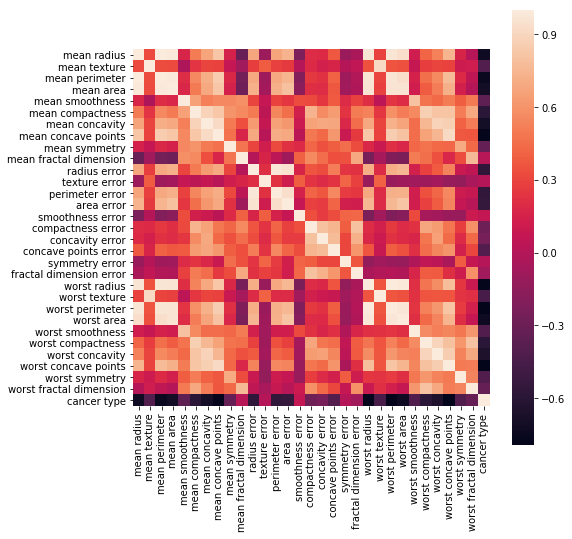

In [4]:
# heatmap
plt.figure(figsize=(8, 8))

sns.heatmap(data.corr(), square=True)
plt.show()

In [5]:
# split the data into train and test sets
from sklearn.model_selection import train_test_split

x = data.iloc[:, :30]
y = data.iloc[:, 30]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=6699, shuffle=True)

print('x_train shape :', x_train.shape)
print('x_test shape :', x_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

x_train shape : (455, 30)
x_test shape : (114, 30)
y_train shape : (455,)
y_test shape : (114,)


In [6]:
# create the model and fit on training data
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=6699)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=6699, verbose=0,
            warm_start=False)

Accuracy :0.9649122807017544
             precision    recall  f1-score   support

          0       0.93      0.98      0.95        43
          1       0.99      0.96      0.97        71

avg / total       0.97      0.96      0.97       114

Confusion Matrix:


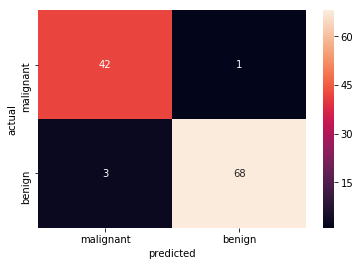

In [7]:
# predict and evaluate the model using test data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

predictions = model.predict(x_test)
print('Accuracy :{}'.format(accuracy_score(y_test, predictions)))

print(classification_report(y_test, predictions))

conf_matrix = pd.DataFrame(confusion_matrix(y_test, predictions),
                           index=['malignant', 'benign'],
                           columns=['malignant', 'benign'])
print('Confusion Matrix:')
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

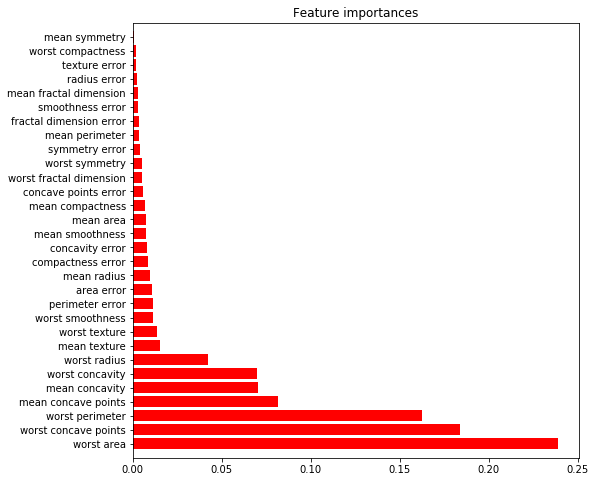

Feature ranking (percentage):
01. (23.90) worst area
02. (18.42) worst concave points
03. (16.27) worst perimeter
04. (8.16) mean concave points
05. (7.05) mean concavity
06. (7.01) worst concavity
07. (4.23) worst radius
08. (1.55) mean texture
09. (1.35) worst texture
10. (1.15) worst smoothness
11. (1.12) perimeter error
12. (1.08) area error
13. (0.96) mean radius
14. (0.87) compactness error
15. (0.80) concavity error
16. (0.77) mean smoothness
17. (0.75) mean area
18. (0.68) mean compactness
19. (0.56) concave points error
20. (0.54) worst fractal dimension
21. (0.50) worst symmetry
22. (0.39) symmetry error
23. (0.37) mean perimeter
24. (0.32) fractal dimension error
25. (0.29) smoothness error
26. (0.27) mean fractal dimension
27. (0.25) radius error
28. (0.17) texture error
29. (0.16) worst compactness
30. (0.07) mean symmetry


In [13]:
# feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances as per the current model
plt.figure(figsize=(8, 8))
plt.title('Feature importances')
plt.barh(range(x_train.shape[1]), importances[indices], color='r')
plt.yticks(range(x_train.shape[1]), x_train.columns[indices])
plt.ylim([-1, x_train.shape[1]])
plt.show()

# Print the feature ranking
print('Feature ranking (percentage):')

for f in range(x_train.shape[1]):
    print('%.2d. (%.2f) %s' % (f + 1, importances[indices[f]]*100, x_train.columns[indices[f]]))